sales forcasting of Wallmart data

In [1]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

import math
from datetime import datetime
from datetime import timedelta

from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
palette = px.colors.qualitative.Safe
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

FEATURE ENGINEERING AND EDA ON DATA SET

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

In [3]:
df_store = pd.read_csv('stores.csv')

In [4]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_test=pd.read_csv('test.csv')

In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
df_features = pd.read_csv('features.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [11]:
df2 = df_test.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [12]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [13]:
df2.drop(['IsHoliday_y'], axis=1,inplace=True)
df2.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df2.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [14]:
df.shape

(421570, 16)

In [15]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [16]:
df = df.loc[df['Weekly_Sales'] > 0]

In [17]:
df.shape


(420212, 16)

In [18]:
unvalues = {}
for col in df.columns:
    unvalues[col] = df[col].value_counts().shape[0]

pd.DataFrame(unvalues, index=['unique value count']).transpose()


,unique value count
Store,45
Dept,81
Date,143
Weekly_Sales,358785
IsHoliday,2
Temperature,3528
Fuel_Price,892
MarkDown1,2277
MarkDown2,1499
MarkDown3,1662


In [19]:
df.duplicated().sum()

0

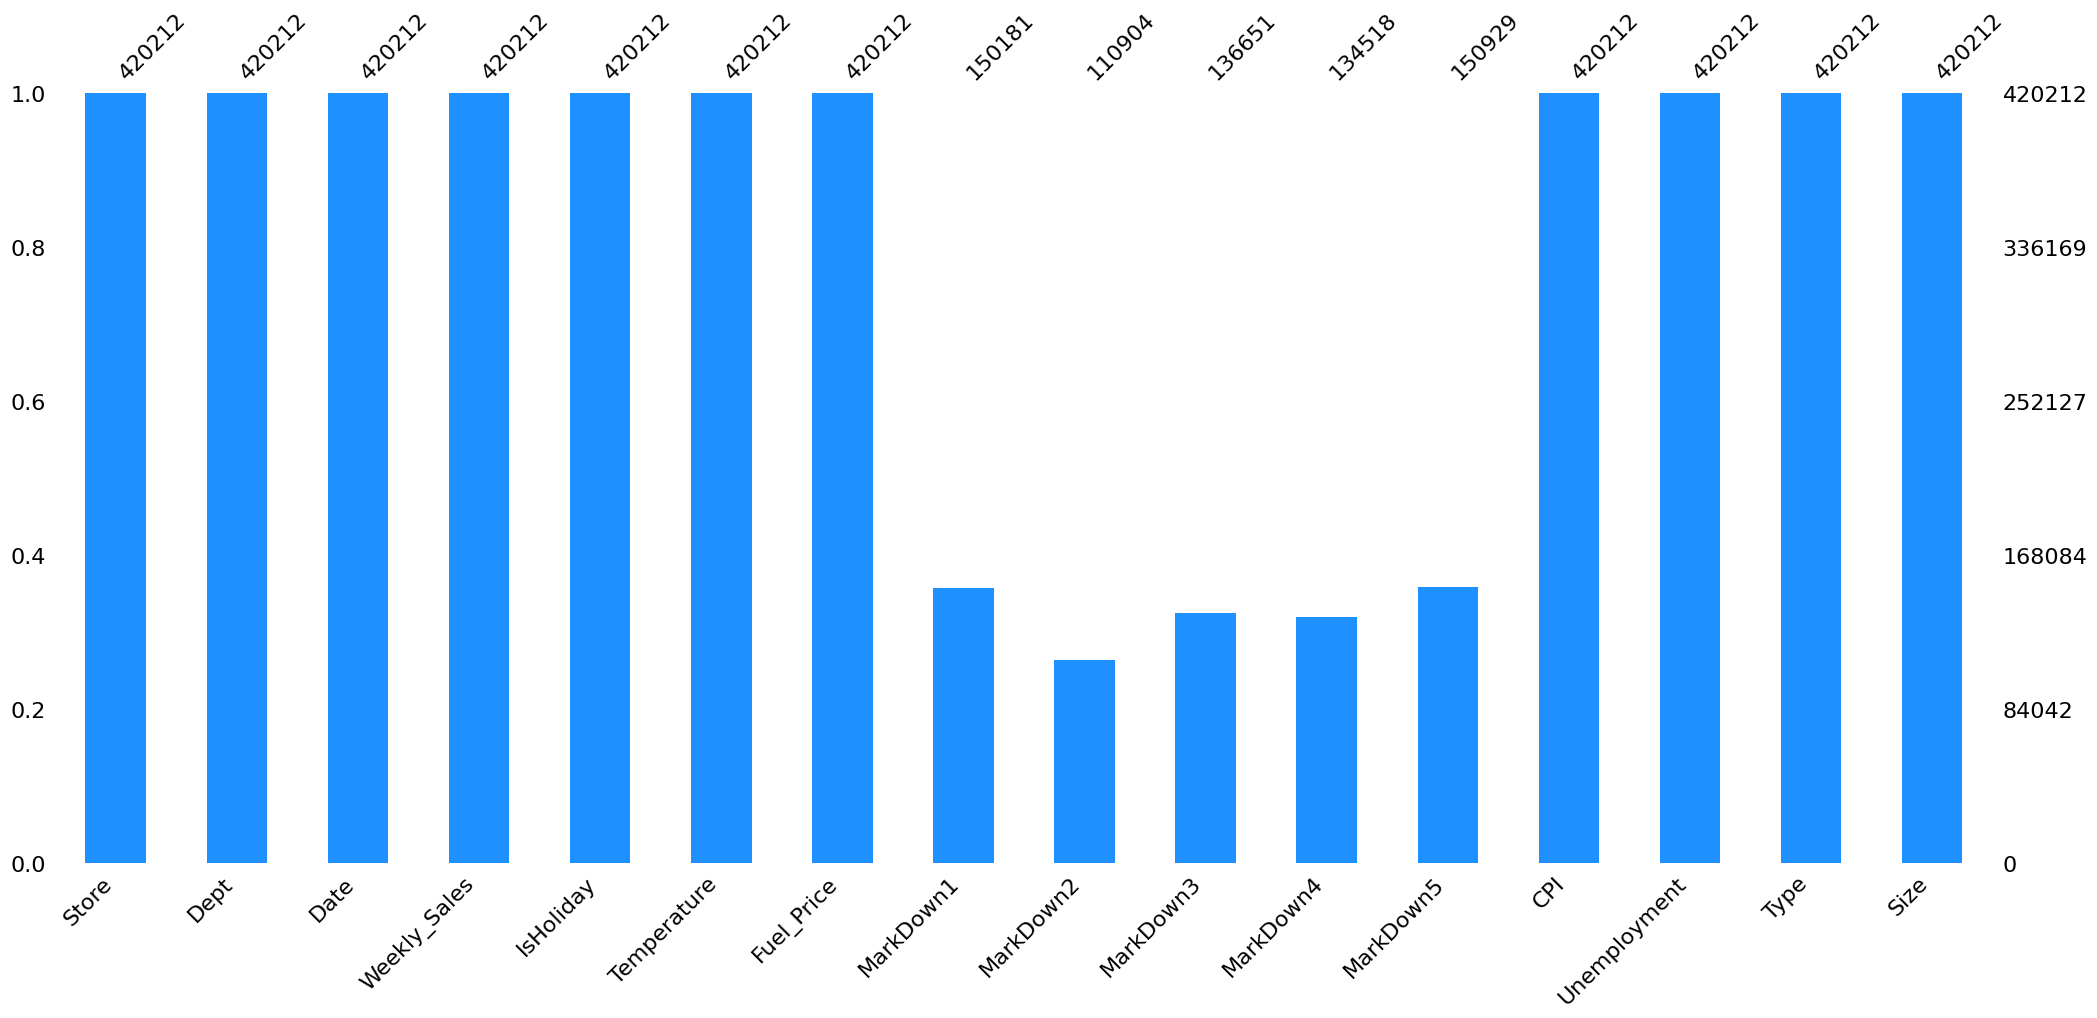

In [20]:
msno.bar(df, color="dodgerblue")
plt.show()

In [21]:
nullvaluecount = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
print(nullvaluecount)

              Total Null Values
Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
Fuel_Price                    0
CPI                           0
Unemployment                  0
Type                          0
Size                          0
MarkDown5                269283
MarkDown1                270031
MarkDown3                283561
MarkDown4                285694
MarkDown2                309308


In [22]:
df = df.fillna(0)

In [23]:
nullvaluecount = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
print(nullvaluecount)

              Total Null Values
Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
Fuel_Price                    0
MarkDown1                     0
MarkDown2                     0
MarkDown3                     0
MarkDown4                     0
MarkDown5                     0
CPI                           0
Unemployment                  0
Type                          0
Size                          0


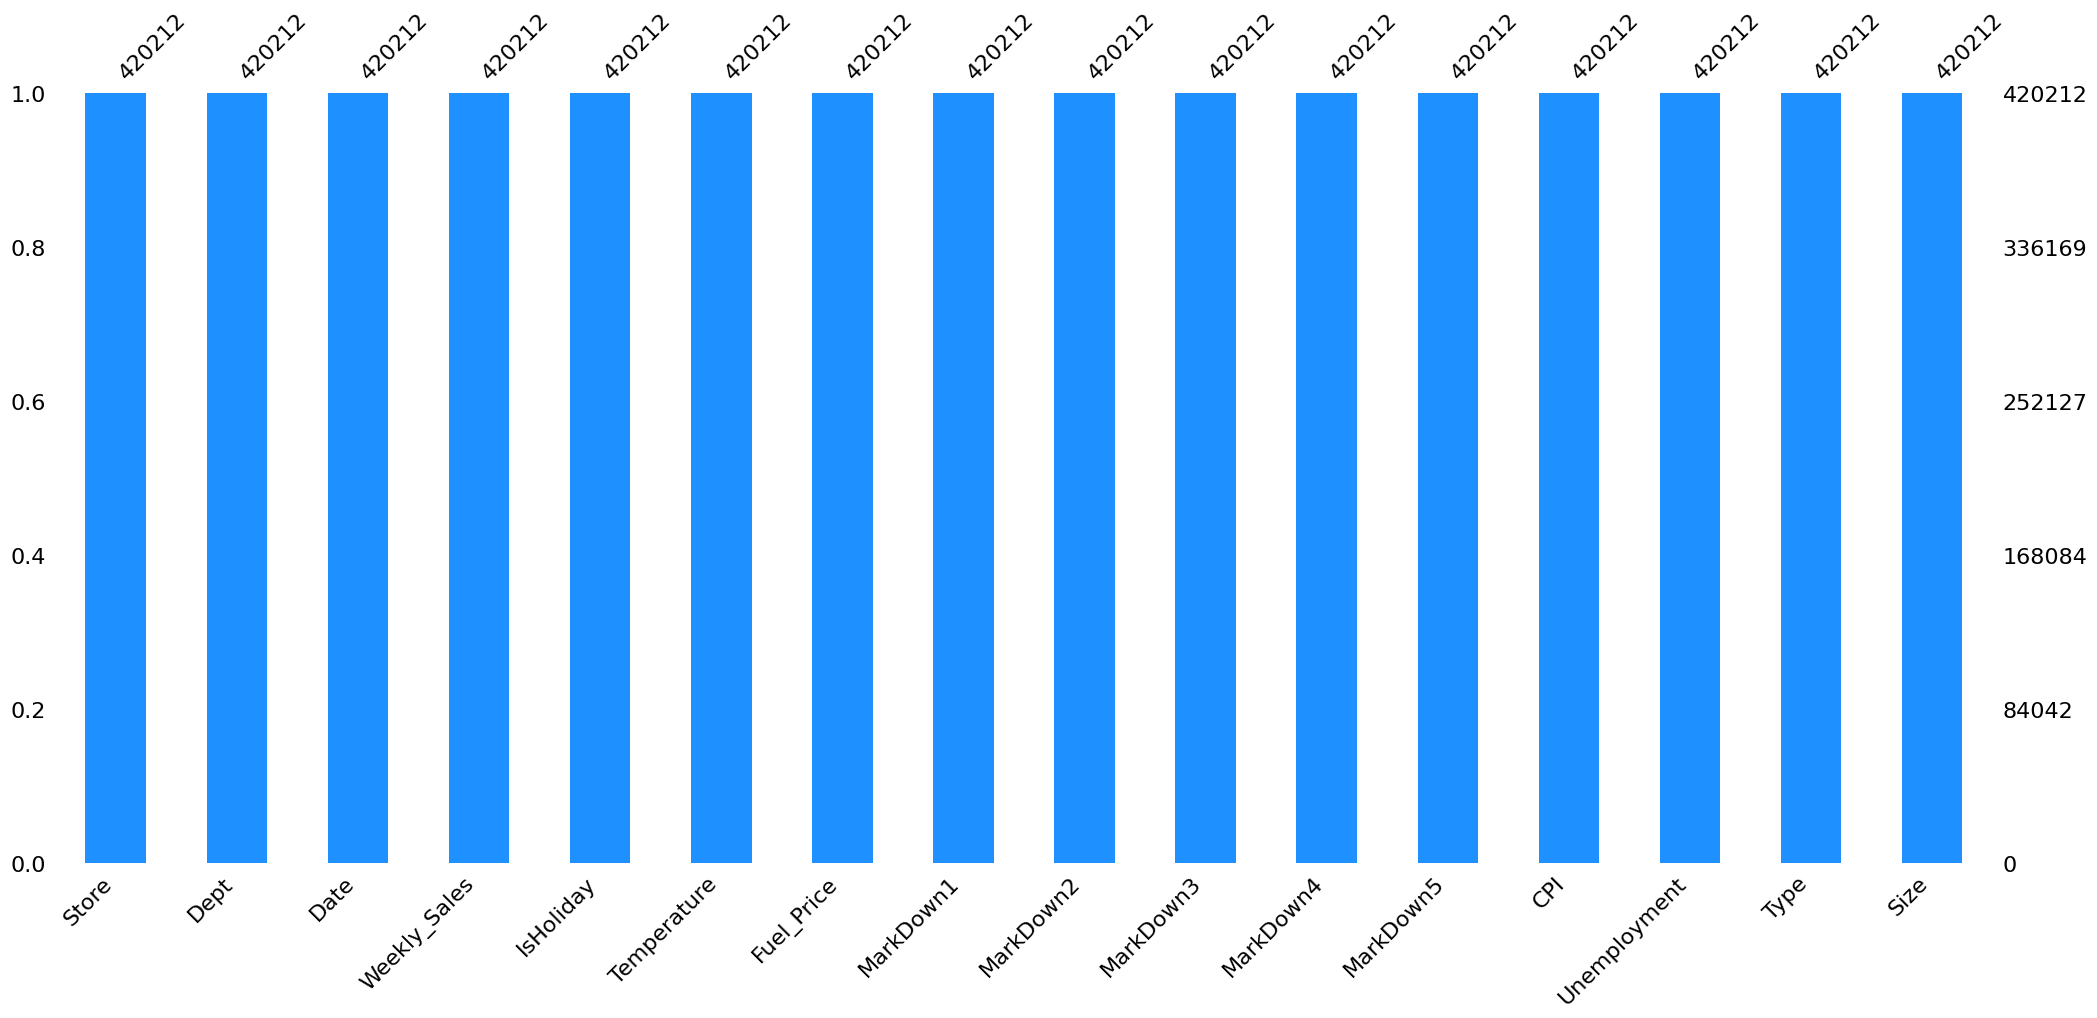

In [24]:
msno.bar(df, color="dodgerblue")
plt.show()

In [25]:
df["Date"] = pd.to_datetime(df["Date"])
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

In [26]:
df['Date'].head(5)

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [27]:
df['Date'].tail(5)

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

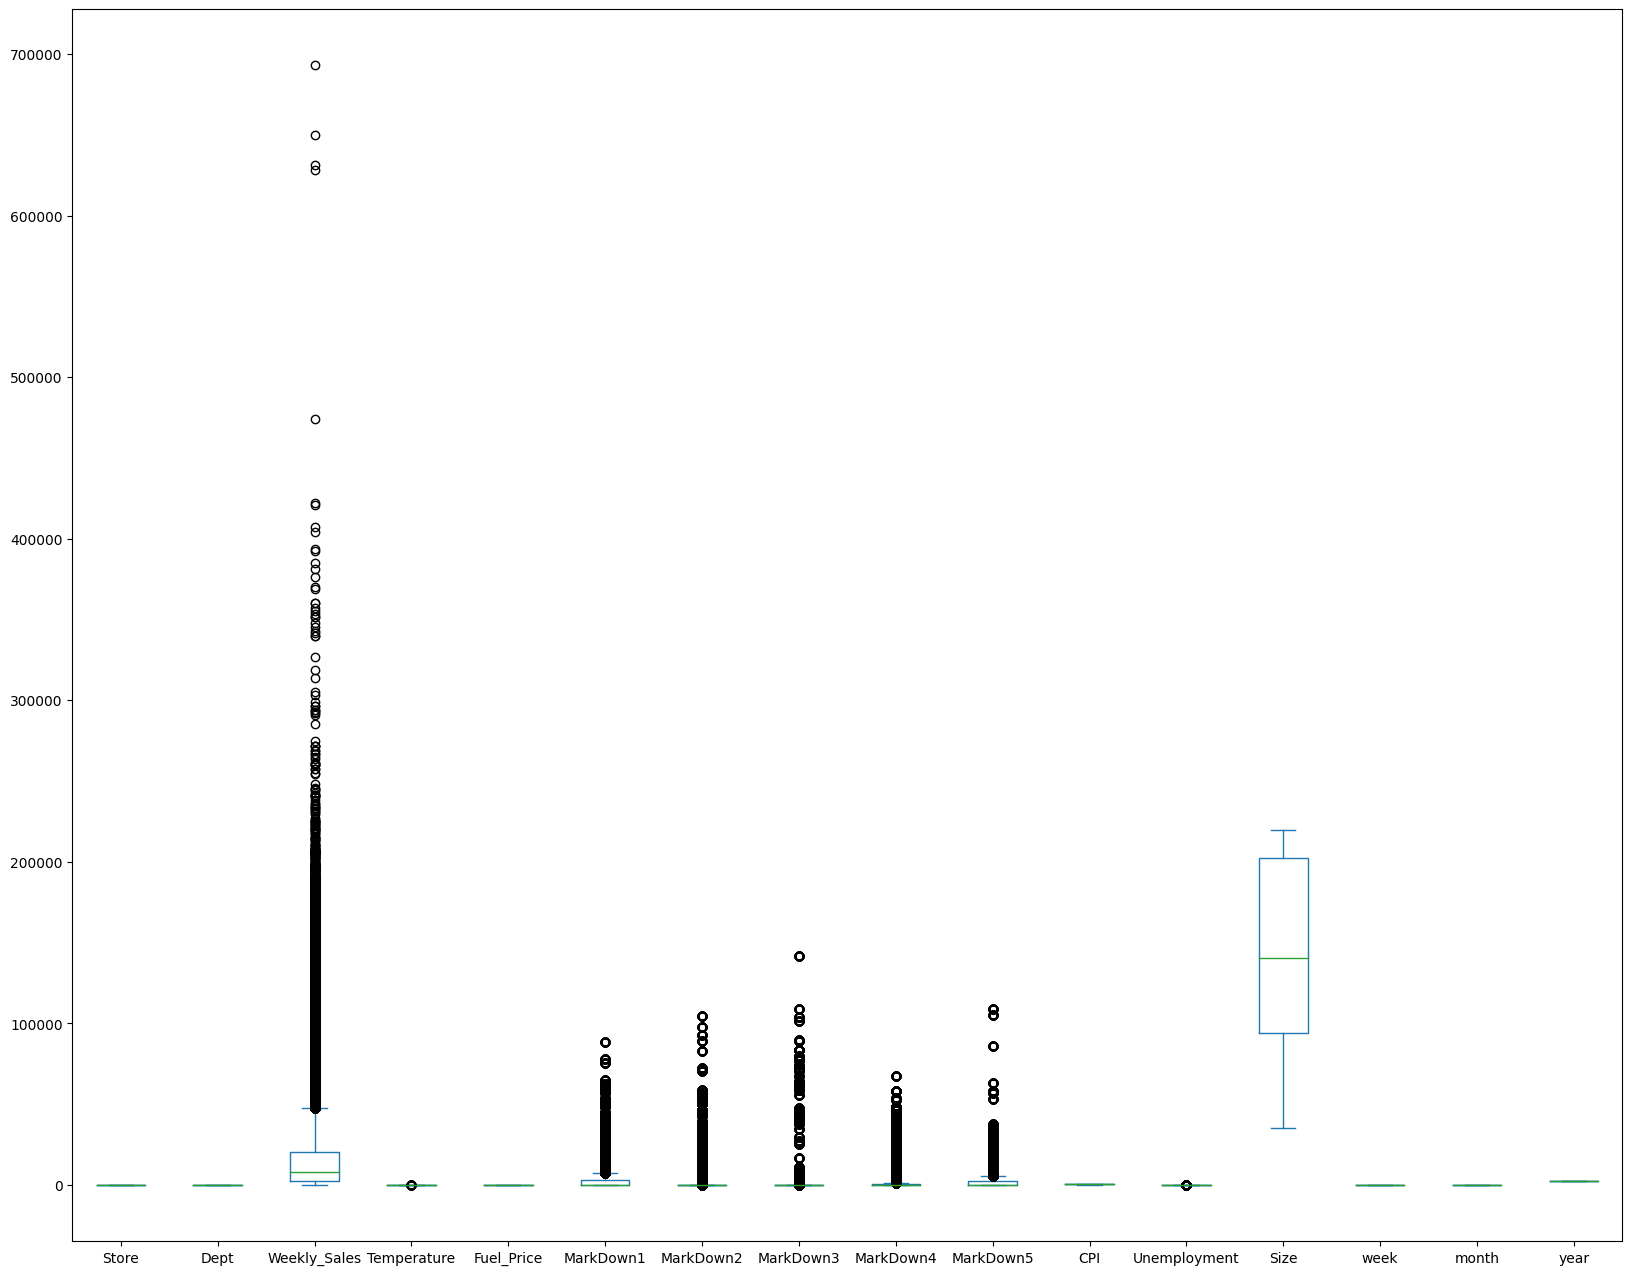

In [28]:
df.plot(kind='box',layout=(3,6),figsize=(20,16))
plt.show()

In [29]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010


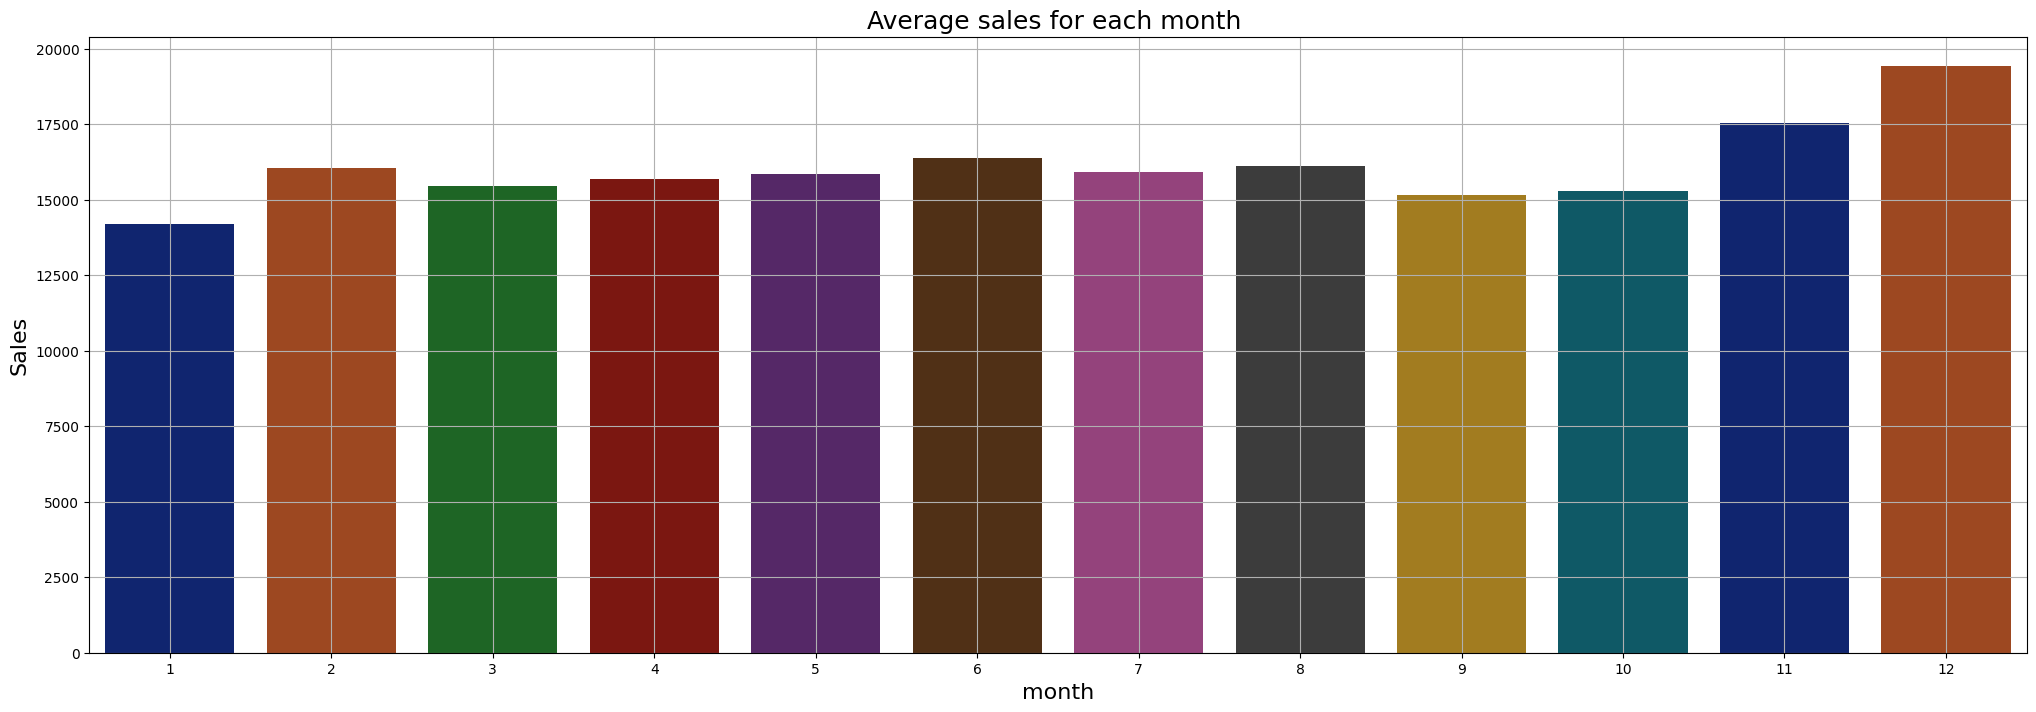

In [30]:
weekly_sales = df['Weekly_Sales'].groupby(df['month']).mean()
plt.figure(figsize=(25,8))
sns.barplot(x=weekly_sales.index,y= weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average sales for each month ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('month', fontsize=16)
plt.show()

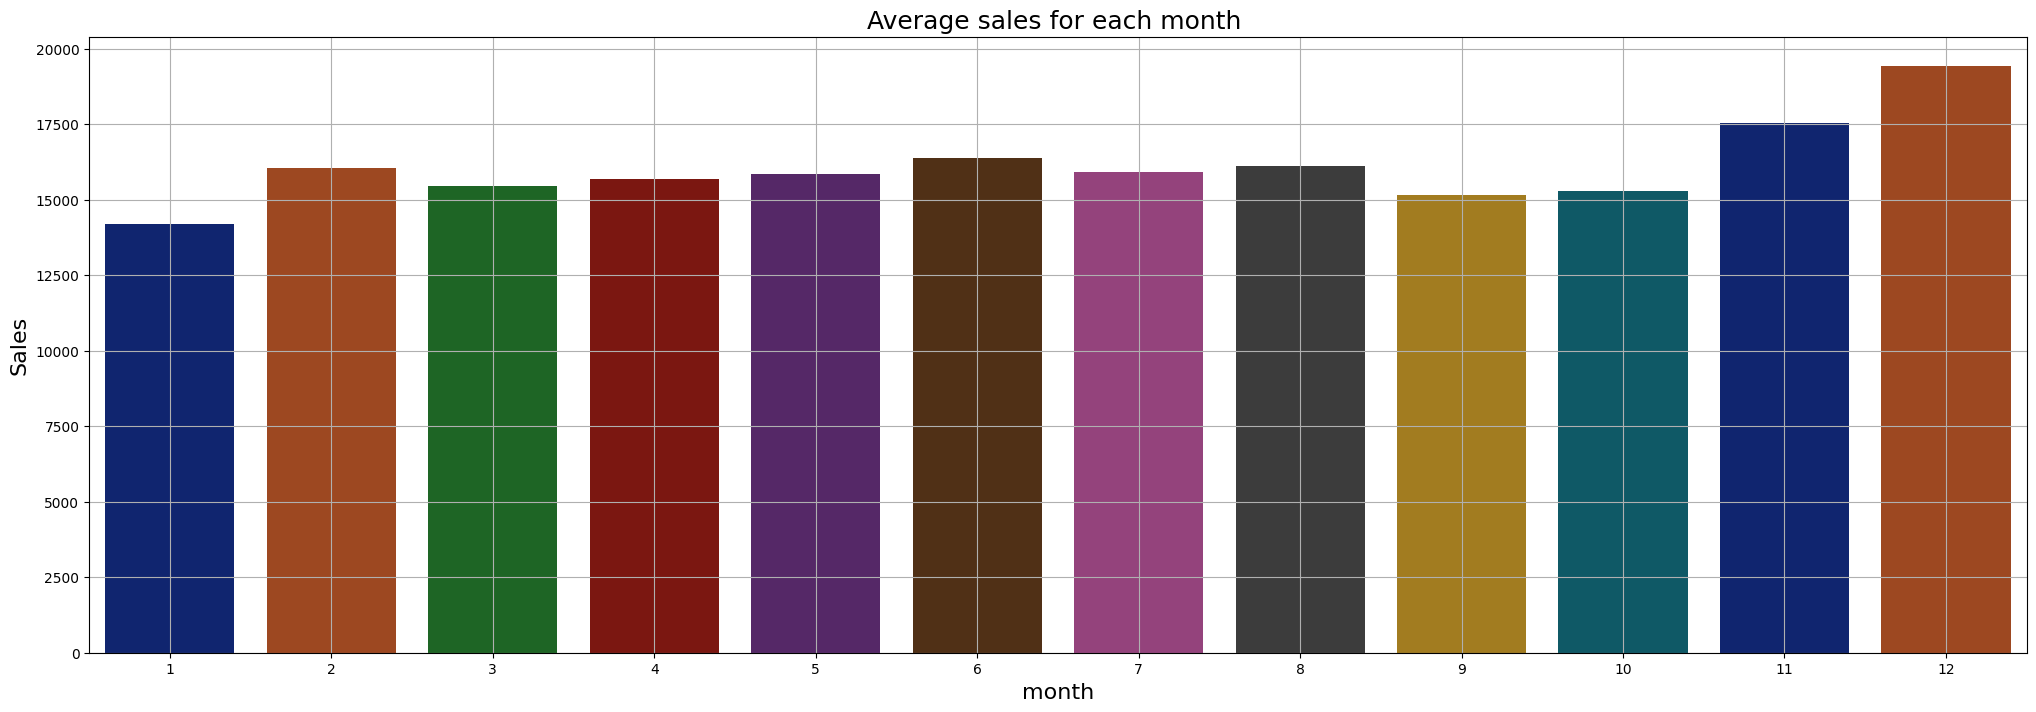

In [31]:

monthly_sales = df.groupby('month')['Weekly_Sales'].mean()
plt.figure(figsize=(25,8))
sns.barplot(x=monthly_sales.index,y= monthly_sales.values, palette='dark')
plt.grid()
plt.title('Average sales for each month ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('month', fontsize=16)
plt.show()

<Axes: xlabel='month', ylabel='Density'>

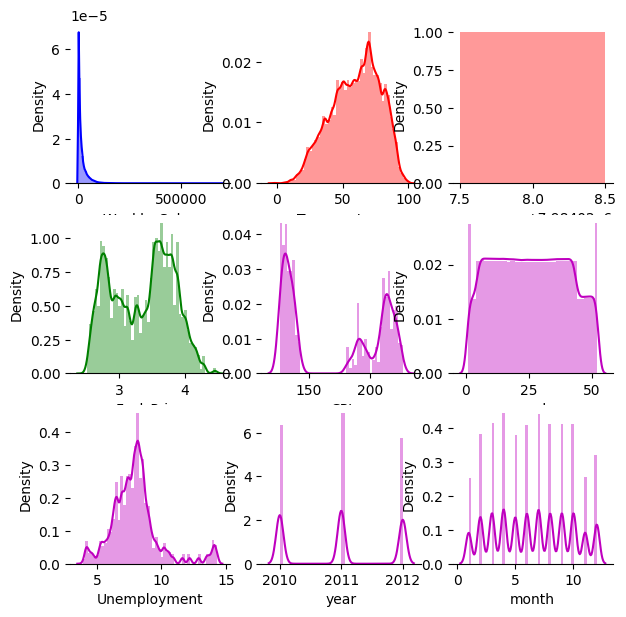

In [32]:
f, axes = plt.subplots(3, 3, figsize=(7, 7), sharex=False)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df.Weekly_Sales, color="b", ax=axes[0, 0])
sns.distplot(df.Temperature, color="r", ax=axes[0, 1])
sns.distplot(df.size, color="r", ax=axes[0, 2])

sns.distplot(df.Fuel_Price, color="g", ax=axes[1, 0])

sns.distplot(df.CPI, color="m", ax=axes[1, 1])
sns.distplot(df.week, color="m", ax=axes[1, 2])

sns.distplot(df.Unemployment, color="m", ax=axes[2, 0])
sns.distplot(df.year, color="m", ax=axes[2, 1])
sns.distplot(df.month, color="m", ax=axes[2, 2])


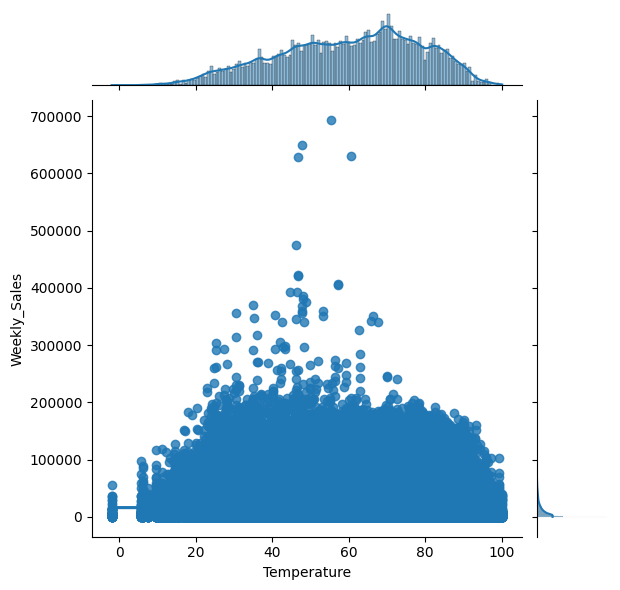

In [33]:
sns.jointplot(x= "Temperature", y= "Weekly_Sales", data=df, kind='reg')

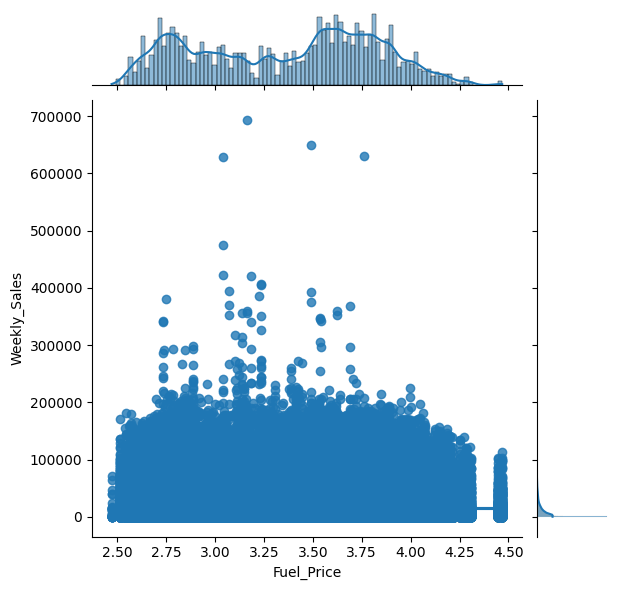

In [34]:
sns.jointplot(x= "Fuel_Price", y= "Weekly_Sales", data=df, kind='reg')

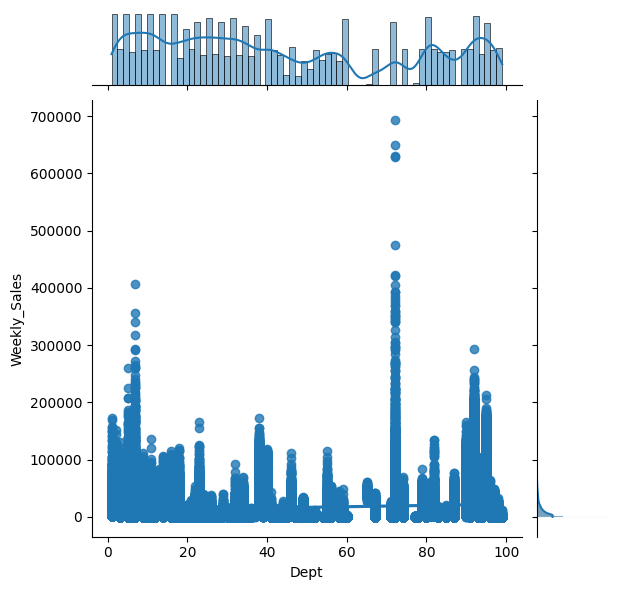

In [35]:
sns.jointplot(x= "Dept", y= "Weekly_Sales", data=df, kind='reg')

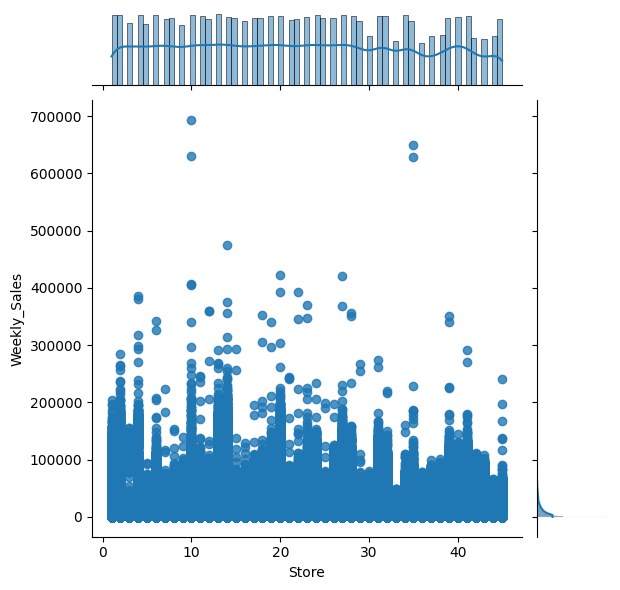

In [36]:
sns.jointplot(x= "Store", y= "Weekly_Sales", data=df, kind='reg')

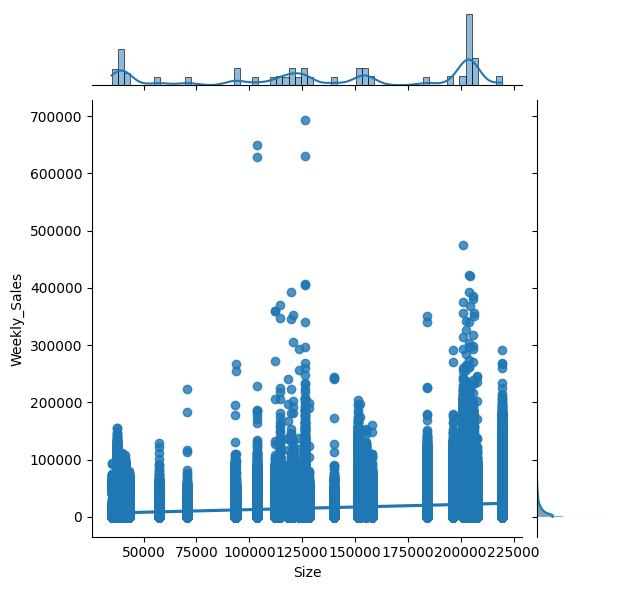

In [37]:
sns.jointplot(x= "Size", y= "Weekly_Sales", data=df, kind='reg')

In [38]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.059970,-0.033727,-0.020301,-0.042808,-0.012605,-0.211261,0.208759,-0.182763,0.000926,0.000907,0.002831
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,0.001454,0.000435,0.001517,0.001881,0.002766,-0.007178,0.007787,-0.002491,0.000767,0.000800,0.003716
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.047249,0.020948,0.038522,0.037470,0.050598,-0.021162,-0.025806,0.244117,0.027659,0.028401,-0.010015
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.003517,0.207326,0.266731,0.011625,-0.015186,-0.001933,0.010555,0.000797,0.127846,0.123058,-0.056572
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.026428,-0.179684,-0.056016,-0.050323,-0.014847,0.182223,0.096768,-0.058413,0.236256,0.235957,0.065712
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.297075,0.029282,0.018646,0.166645,0.215588,-0.164199,-0.033915,0.003632,-0.031191,-0.040931,0.779681
MarkDown1,-0.059970,0.001454,0.047249,-0.003517,-0.026428,0.297075,1.000000,0.175005,-0.014425,0.838866,0.415271,0.010915,-0.105257,0.169891,-0.093640,-0.089261,0.501068
MarkDown2,-0.033727,0.000435,0.020948,0.207326,-0.179684,0.029282,0.175005,1.000000,-0.006090,0.113446,0.131847,-0.003694,-0.041497,0.078392,-0.013070,-0.019602,0.132026
MarkDown3,-0.020301,0.001517,0.038522,0.266731,-0.056016,0.018646,-0.014425,-0.006090,1.000000,-0.012031,0.042542,-0.005959,-0.018078,0.033671,0.122398,0.116100,0.006802
MarkDown4,-0.042808,0.001881,0.037470,0.011625,-0.050323,0.166645,0.838866,0.113446,-0.012031,1.000000,0.303536,-0.002061,-0.076583,0.127415,-0.114217,-0.105607,0.335360


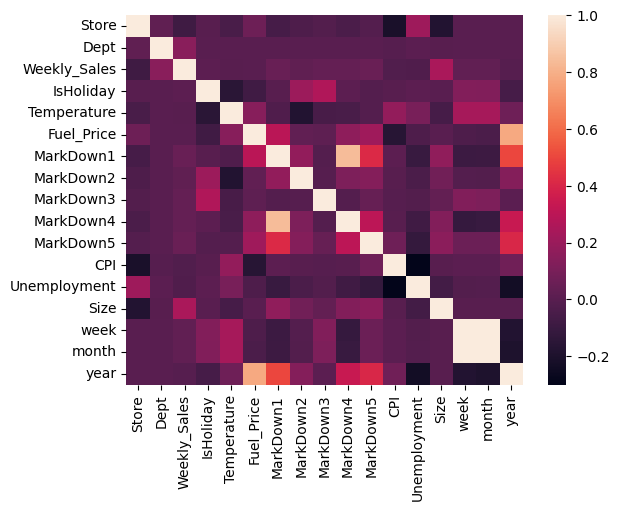

In [39]:
sns.heatmap( df.corr(), annot=False );

In [40]:
sizes= df.groupby('Size').mean()
fig=px.line(sizes, x = sizes.index, y = sizes.Weekly_Sales,
        title='The Relation between store size and sales',color_discrete_sequence=palette, template = 'plotly_dark')
fig.show()

IT SHOWS THAT THERE IS AN INCRESING SALES PATTERN IF WE INCRESE STORE SIZE

<Axes: xlabel='month'>

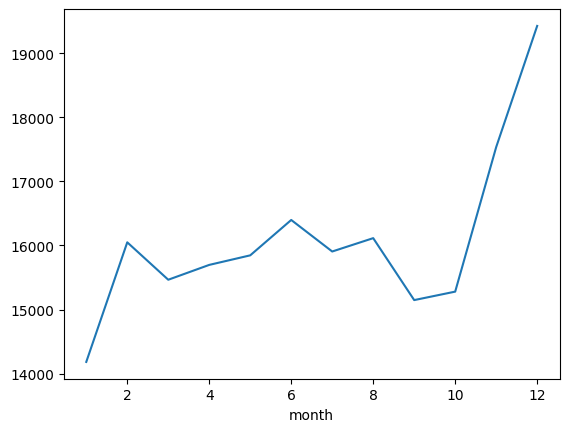

In [41]:
monthly_sales = df.groupby('month')['Weekly_Sales'].mean()
monthly_sales.plot()

In [42]:
df_new = df.copy()

In [43]:
type_group = {'A':1, 'B': 2, 'C': 3}
df_new['Type'] = df_new['Type'].replace(type_group)

In [44]:
df_new['IsHoliday'] = df_new['IsHoliday'].astype(bool).astype(int)

In [45]:
df['Date'] = df['Date'].astype(str)


In [46]:
df_new0=df_new.copy()

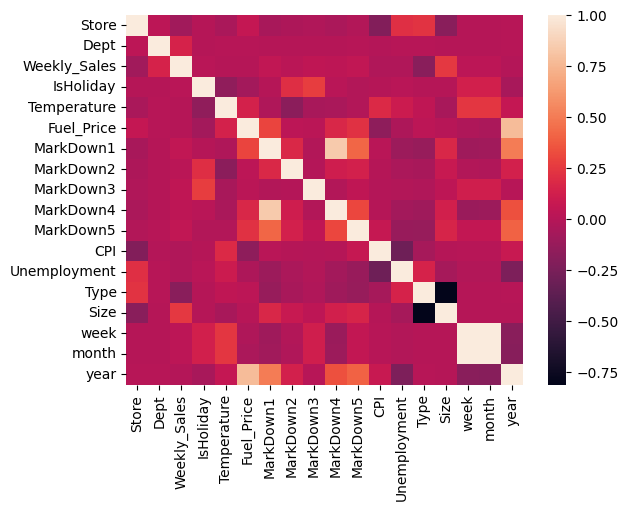

In [47]:
sns.heatmap( df_new0.corr(), annot=False );

DUE TOLESS CORRELATION BETWEEN WEEKLY SALES AND  ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment','Date'] COLUMNS SO WE CAN DROP THEM TO GET A BETTER OUTPUT

In [48]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment','Date']
df_new0.drop(drop_col, axis=1, inplace=True)

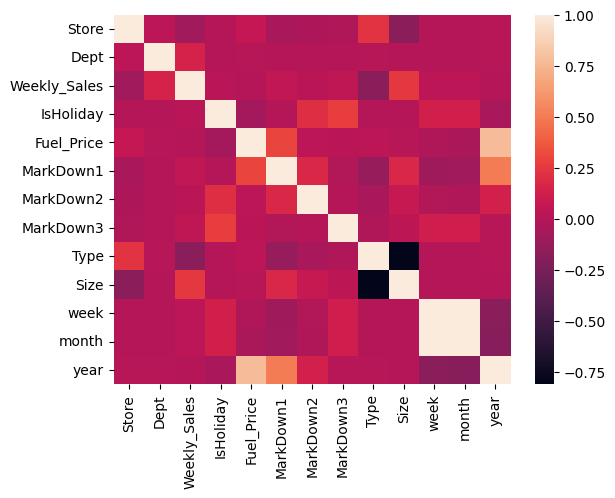

In [49]:
sns.heatmap( df_new0.corr(), annot=False );

In [50]:
df_new0

,Store,Dept,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,24924.50,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
1,1,2,50605.27,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
2,1,3,13740.12,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
3,1,4,39954.04,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
4,1,5,32229.38,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421566,45,94,5203.31,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421567,45,95,56017.47,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421568,45,97,6817.48,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012


In [51]:
X = df_new0.drop(columns=['Weekly_Sales'])


In [52]:
X

,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
1,1,2,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
2,1,3,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
3,1,4,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
4,1,5,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421566,45,94,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421567,45,95,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421568,45,97,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012


In [53]:
Y = df['Weekly_Sales']
Y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 420212, dtype: float64

**APPLYING DIFFERENT SCALING TECHNIQUES TO CHECK IF THEY CONTRIBUTE IN GREATER ACCURACY**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [56]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)

In [57]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X2_train = sc.fit_transform(X_train)
X2_test = sc.transform(X_test)

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X1_train, y_train)

RandomForestRegressor()

In [60]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X2_train, y_train)

RandomForestRegressor()

In [61]:
ypred = model.predict(X_test)

from sklearn.metrics import r2_score
r2score = r2_score(y_test,ypred)
print("R2Score",r2score*100)

R2Score 97.42919257992574


In [62]:
ypred1 = model1.predict(X1_test)

from sklearn.metrics import r2_score
r2score = r2_score(y_test,ypred1)
print("R2Score",r2score*100)

R2Score 97.4400031516494


In [63]:
ypred2 = model2.predict(X2_test)

from sklearn.metrics import r2_score
r2score = r2_score(y_test,ypred2)
print("R2Score",r2score*100)

R2Score 97.39887734451464


In [64]:
from sklearn.tree import DecisionTreeRegressor

# CreatING an instance of DecisionTreeRegressor with optional parameters
#  specify hyperparameters like max_depth, min_samples_split, etc.
regressor = DecisionTreeRegressor()

# Fit the regressor to your training data
regressor.fit(X_train, y_train)

# Make predictions on a new dataset ( X_test)
y_pred1 = regressor.predict(X_test)


In [71]:
regressor.fit(X1_train, y_train)

# Make predictions on a new dataset ( X1_test)
y__pred2 = regressor.predict(X1_test)

In [65]:


from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred1)
print("R2Score",r2score*100)

R2Score 95.64257801256518


In [72]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y__pred2)
print("R2Score",r2score*100)

R2Score 8.634695284578964


In [66]:
from sklearn.linear_model import LinearRegression

# Creating an instance of LinearRegression
regressor = LinearRegression()

# Fitting the regressor to your training data
regressor.fit(X_train, y_train)

#  predictions on a new dataset ( X_test)
y_pred2 = regressor.predict(X_test)


In [74]:
regressor.fit(X1_train, y_train)

#  predictions on a new dataset ( X1_test)
y_pred3 = regressor.predict(X1_test)


In [67]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred2)
print("R2Score",r2score*100)

R2Score 8.634695284578964


In [75]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred3)
print("R2Score",r2score*100)

R2Score 8.634695284578964
